In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

# CIS 105 Final Project 

## Abstract (in 200 words or less explain what you set out to do and what you found)

## Data Cleaning (this can be a direct copy of milestone 1)

## Basic data exploration via some visualizations 

## Hypothesis 1 (copy from milestone 2)
(repeat this structure. 2 hypothesis per team member. Groups of 2 will do 4. Groups of 3 will do 6.)

Remember to hit all these points while testing your hypothesis

* What is your null hypothesis?

* What is your alternate hypothesis?

* What statistic are you picking in order to assess the validity of the null hypothesis?

* What is the observed value of the statistic?

* What significance level are you using? 

In [56]:
combine = pd.read_csv('~/Downloads/combine.csv')

combine = combine[['year', 'name', 'position', 'heightinchestotal', 'weight', 'fortyyd', 'twentyss', 'threecone', 'vertical', 'broad', 'bench', 'round','picktotal', 'college']]
combine = combine.rename(columns = {'year' : 'Year',
                                    'name' : 'Name',
                                    'position' : 'Position', 
                                    'heightinchestotal' : 'Height (in)',
                                    'weight' : 'Weight (lbs)', 
                                    'fortyyd' : '40 Yard Dash', 
                                    'twentyss' : '20 Yard Shuttle',
                                    'threecone' : '3-Cone Drill', 
                                    'vertical' : 'Vertical Jump (in)',
                                    'broad' : 'Broad Jump (in)',
                                    'round' : 'Round Drafted',
                                    'picktotal' : 'Overall Pick',
                                    'bench' : 'Bench Press Reps',
                                    'college' : 'College'})

combine = combine.drop(combine[combine.Year < 2010].index)
combine = combine.drop(combine[combine.Year > 2014].index)

draft = {0 : 'Undrafted'}
stat = {0 : 'N/A'}

combine = combine.replace({'Round Drafted' : draft,
                           'Overall Pick' : draft})
combine = combine.replace({'40 Yard Dash' : stat, 
                           '20 Yard Shuttle' : stat, 
                           '3-Cone Drill' : stat,
                           'Vertical Jump (in)' : stat,
                           'Broad Jump (in)' : stat,
                           'Bench Press Reps' : stat})
combine.to_csv('data_tanner_joey_isaiah_cleaned.csv')
combine.head()

,Year,Name,Position,Height (in),Weight (lbs),40 Yard Dash,20 Yard Shuttle,3-Cone Drill,Vertical Jump (in),Broad Jump (in),Bench Press Reps,Round Drafted,Overall Pick,College
320,2014,Jared Abbrederis,WR,73.0,195,4.5,4.08,6.8,30.5,117,4,6,176,Wisconsin
321,2014,Davante Adams,WR,73.0,212,4.56,4.3,6.82,39.5,123,14,2,53,Fresno St.
322,2014,Mo Alexander,SS,73.0,220,4.54,4.51,7.05,38,123,N/A,4,110,Utah St.
323,2014,Ricardo Allen,CB,69.0,187,4.61,4.15,N/A,35.5,117,13,5,147,Purdue
324,2014,Jace Amaro,TE,77.0,265,4.74,4.3,7.42,33,118,28,2,49,Texas Tech


In [58]:
combine.groupby("Position", as_index = False).agg({"Round Drafted": "count"})

,Position,Round Drafted
0,C,12
1,CB,165
2,DE,130
3,DT,117
4,FB,12
5,FS,50
6,ILB,66
7,K,4
8,LS,1
9,NT,4


## Visualization that leads to a hypothesis

Most hypothesis show up once you explore the data, create a visualization, and then realize something might be happening.

In [4]:
skills = ["WR", "SS", "FS", "CB"]

In [5]:
skills = combine[combine["Position"].isin(skills)]

In [6]:
#WRs = combine[combine["Position"]=="WR"]

In [7]:
skills = skills[skills["40 Yard Dash"]!= "N/A"]

In [8]:
skills = skills[["Position","40 Yard Dash","Overall Pick"]]

In [9]:
skills

,Position,40 Yard Dash,Overall Pick
320,WR,4.5,176
321,WR,4.56,53
322,SS,4.54,110
323,CB,4.61,147
330,SS,4.66,Undrafted
...,...,...,...
1833,WR,4.53,101
1834,WR,4.5,Undrafted
1839,CB,4.43,29
1841,SS,4.64,Undrafted


In [10]:
d_skills = skills[skills["Overall Pick"]!="Undrafted"]

In [11]:
d_skills.sort_values("40 Yard Dash")

,Position,40 Yard Dash,Overall Pick
1529,CB,4.25,81
737,WR,4.27,78
1642,WR,4.28,108
1341,WR,4.31,111
1456,CB,4.31,5
...,...,...,...
1708,FS,4.73,136
1138,CB,4.74,146
1399,SS,4.74,144
488,WR,4.77,63


In [51]:
d_dash =np.mean(d_skills['40 Yard Dash'])
d_dash

4.502215189873415

In [12]:
u_skills = skills[skills["Overall Pick"]=="Undrafted"]

In [13]:
u_skills

,Position,40 Yard Dash,Overall Pick
330,SS,4.66,Undrafted
348,WR,4.73,Undrafted
356,WR,4.51,Undrafted
363,WR,4.58,Undrafted
375,WR,4.56,Undrafted
...,...,...,...
1821,FS,4.62,Undrafted
1828,WR,4.49,Undrafted
1831,WR,4.59,Undrafted
1834,WR,4.5,Undrafted


In [50]:
u_dash = np.mean(u_skills["40 Yard Dash"])
u_dash

4.577619047619045

In [52]:
obs = d_dash - u_dash
obs

-0.07540385774562974

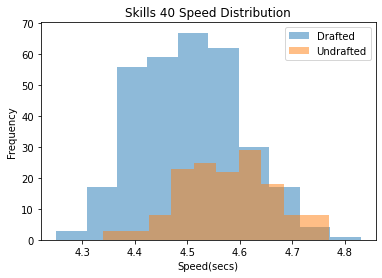

In [18]:
plt.title("Skills 40 Speed Distribution")
plt.hist(d_skills['40 Yard Dash'], alpha=0.5, label='Drafted')
plt.hist(u_skills['40 Yard Dash'], alpha=0.5, label='Undrafted')
plt.ylabel('Frequency')
plt.xlabel('Speed(secs)')
plt.legend()
plt.show()

In [45]:
u_dash = np.mean(u_skills.sample(len(u_skills), replace=True).loc[:, '40 Yard Dash'])

What is your null hypothesis?
Speed does not matter between skills who are drafted and undrafted.

What is your alternate hypothesis?
Skills who are draffted are genrally faster than those who arent drafted.


What statistic are you picking in order to assess the validity of the null hypothesis?
I will compare the avg 40 times of drafted and undrafted and simulate numbers scenarios to see if there is any other cases where the difference between the two in speed will be equal to 0.


What is the observed value of the statistic?
-0.07540385774562974

What significance level are you using? 
0.05

In [19]:

trails = 1000
draft_means = []
undraft_means= []
diff_means = []


for i in np.arange(trails): 
 
    draft_mean = np.mean(d_skills.sample(len(d_skills), replace=True).loc[:, '40 Yard Dash'])
    undraft_mean = np.mean(u_skills.sample(len(u_skills), replace=True).loc[:, '40 Yard Dash'])
    

    draft_means.append(draft_mean)
    undraft_means.append(undraft_mean)
    
   
    diff_means.append(draft_mean - undraft_mean)

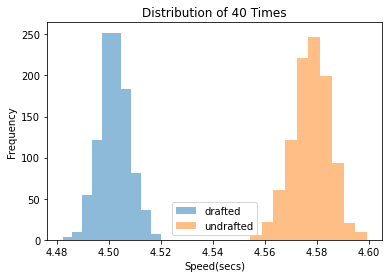

In [72]:
plt.title('Distribution of 40 Times')
plt.hist(draft_means, alpha=0.5, label='drafted')
plt.hist(undraft_means, alpha=0.5, label='undrafted')
plt.ylabel('Frequency')
plt.xlabel('Speed(secs)')
plt.legend()



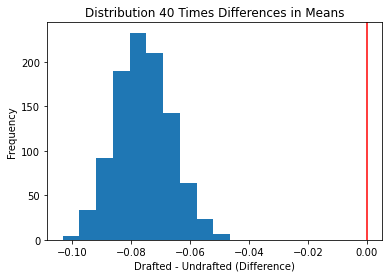

In [74]:
plt.title('Distribution 40 Times Differences in Means')
plt.hist(diff_means)
plt.ylabel('Frequency')
plt.xlabel('Drafted - Undrafted (Difference)')
plt.axvline(x= 0, color='r')
plt.show()

In [81]:
p_value = sum(np.array(diff_means) >= 0) / len(diff_means)
p_value

0.0

The p-value is less than 0.05 so we reject the null and accept the alterantive. This means that skill players who are drafted are on average faster than those who are not. I find this not thtat shocking because most of the time scout are looking for what your 40 time is in the combine because you need to be fast enough to play in the NFL if your fill isnt that good. So people who dont have fill tend to want to make combine look impressicve by running a good 40.

## Hypothesis 2

In [24]:
shuttle = combine[combine["20 Yard Shuttle"]!= "N/A"]

In [31]:
shuttle = shuttle[["20 Yard Shuttle","Weight (lbs)"]]

In [34]:
h_shuttle = shuttle[shuttle["Weight (lbs)"] >= 250]

In [36]:
h_shuttle

,20 Yard Shuttle,Weight (lbs)
324,4.3,265
331,4.19,255
339,4.44,302
342,4.66,310
343,4.61,298
...,...,...
1840,4.62,250
1842,4.67,309
1844,4.29,254
1847,4.87,316


In [62]:
h_yard =np.mean(h_shuttle['20 Yard Shuttle'])
h_yard

4.629062499999998

In [37]:
l_shuttle = shuttle[shuttle["Weight (lbs)"] < 250]

In [39]:
l_shuttle

,20 Yard Shuttle,Weight (lbs)
320,4.08,195
321,4.3,212
322,4.51,220
323,4.15,187
325,4.49,225
...,...,...
1833,4.31,221
1834,4.11,210
1838,4.53,239
1841,4.17,223


In [63]:
l_yard =np.mean(l_shuttle['20 Yard Shuttle'])
l_yard

4.247525473071326

In [64]:
obs = h_yard- l_yard
obs

0.3815370269286724

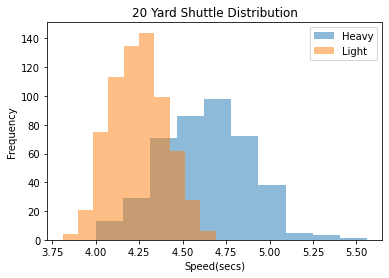

In [40]:
plt.title("20 Yard Shuttle Distribution")
plt.hist(h_shuttle['20 Yard Shuttle'], alpha=0.5, label='Heavy')
plt.hist(l_shuttle['20 Yard Shuttle'], alpha=0.5, label='Light')
plt.ylabel('Frequency')
plt.xlabel('Speed(secs)')
plt.legend()
plt.show()

What is your null hypothesis?
There is no difference between heavier and lighter players 20 yards shuttles.

What is your alternate hypothesis?
There is a difference between people who are heavier and lighter 20 yard shuttle times

What statistic are you picking in order to assess the validity of the null hypothesis?
Anyone over 250 is going to be considered heavy and under called lighter. Find the mean of simulated numbers and see if there is a significant differences.


What is the observed value of the statistic?
0.3815370269286724

What significance level are you using? 
0.05

In [41]:
trails = 1000
heavy_means = []
light_means= []
diffs_means = []


for i in np.arange(trails): 
 
    heavy_mean = np.mean(h_shuttle.sample(len(h_shuttle), replace=True).loc[:, '20 Yard Shuttle'])
    light_mean = np.mean(l_shuttle.sample(len(l_shuttle), replace=True).loc[:, '20 Yard Shuttle'])
    
    
    heavy_means.append(heavy_mean)
    light_means.append(light_mean)
    
    
    diffs_means.append(heavy_mean - light_mean)

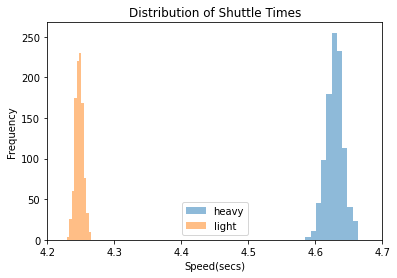

In [73]:
plt.title('Distribution of Shuttle Times')
plt.hist(heavy_means, alpha=0.5, label='heavy')
plt.hist(light_means, alpha=0.5, label='light')
plt.xticks(np.arange(4.2,4.8,.1))
plt.ylabel('Frequency')
plt.xlabel('Speed(secs)')
plt.legend()

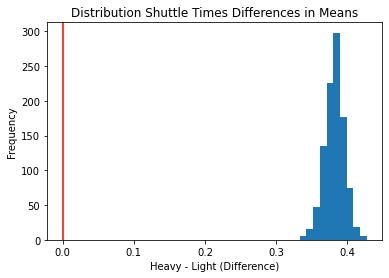

In [75]:
plt.title('Distribution Shuttle Times Differences in Means')
plt.hist(diffs_means)
plt.ylabel('Frequency')
plt.xlabel('Heavy - Light (Difference)')
plt.axvline(x=0, color='r')
plt.show()

In [79]:
p_value = sum(np.array(diffs_means) <= 0) / len(diffs_means)
p_value

0.0

The p_value is less than 0.05 which mean we reject the null. This means that people who are heavier on average are slower in the 20 yard shuttle. I would believe this is correwct because the 20 yard shuttle is really and evalution of your agiltiy because you have to switch directions many times. I would believe that the lighter you are the more quick you would be.